In [55]:
%matplotlib notebook
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Imputer, StandardScaler
import numpy as np

import matplotlib.pyplot as plt
import pandas

In [56]:
training_data = pandas.read_csv('train.csv')

In [57]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocessing

In [58]:
imputer = Imputer(strategy='median')

In [59]:
X = training_data[['LotFrontage', 'LotArea', "WoodDeckSF", 'PoolArea', 'OpenPorchSF', 'EnclosedPorch', 'GarageArea']]
#X = training_data[['LotArea', 'GarageArea']]
X = imputer.fit_transform(X)
X

array([[    65.,   8450.,      0., ...,     61.,      0.,    548.],
       [    80.,   9600.,    298., ...,      0.,      0.,    460.],
       [    68.,  11250.,      0., ...,     42.,      0.,    608.],
       ..., 
       [    66.,   9042.,      0., ...,     60.,      0.,    252.],
       [    68.,   9717.,    366., ...,      0.,    112.,    240.],
       [    75.,   9937.,    736., ...,     68.,      0.,    276.]])

In [60]:
y = training_data[['SalePrice']]
y.values

array([[208500],
       [181500],
       [223500],
       ..., 
       [266500],
       [142125],
       [147500]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

RMSE: 3211265308.37374
R2: 0.50


<IPython.core.display.Javascript object>


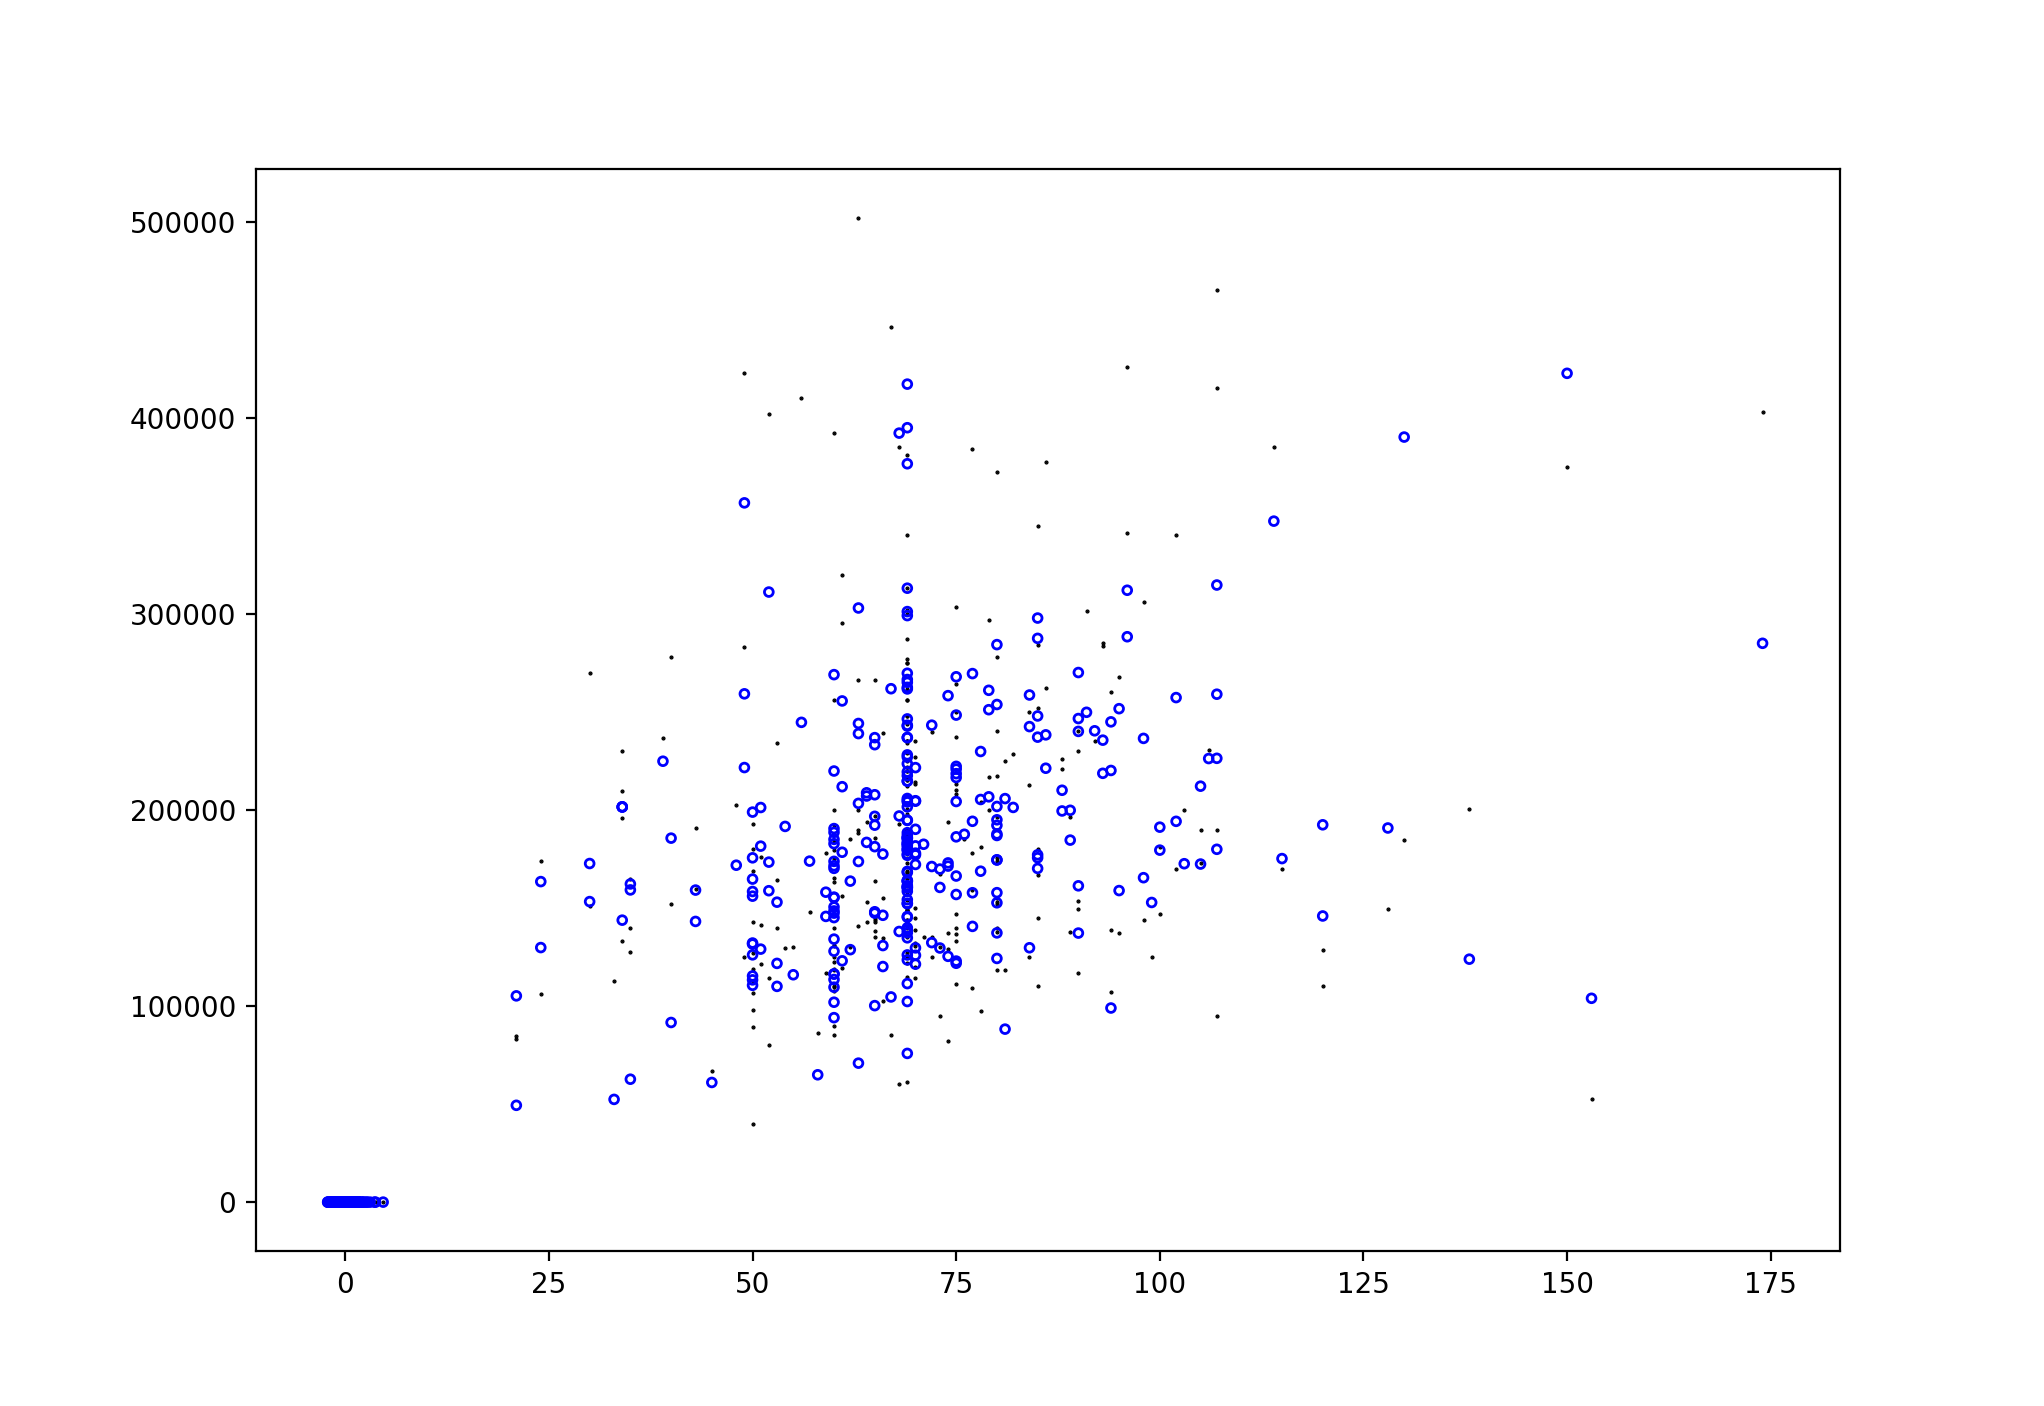

In [62]:
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
y_scaler = StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)
regr = linear_model.Ridge(alpha=0)
for iterations in range(10):
    regr.fit(X_train, y_train)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred = regr.predict(X_test)
print("RMSE: %.5f" % mean_squared_error(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_pred)))
print("R2: %.2f" % r2_score(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_pred)))

plt.scatter(X_test[:,0], y_test,color='black', marker='.', s=1)
plt.scatter(X_test[:,0], y_pred, color='blue', marker='o', s=10, facecolors='none')
plt.xticks()
plt.yticks()
plt.show()

# Testset Data

In [101]:
test = pandas.read_csv('test.csv')
ids = test[['Id']].values
testing_X = test[['LotFrontage', 'LotArea', "WoodDeckSF", 'PoolArea', 'OpenPorchSF', 'EnclosedPorch', 'GarageArea', 'GarageCars']]
testing_X = imputer.transform(X)
testing_X = X_scaler.transform(testing_X)
y_pred = regr.predict(testing_X)

In [104]:
y_output = y_scaler.inverse_transform(y_pred)

out = open('submission.csv','w')

print("Id,SalePrice")
out.write("Id,SalePrice\n")
for i in range(len(ids)):
    print("{},{}".format(ids[i, 0], y_output[i, 0]))
    out.write("{},{}\n".format(ids[i, 0], y_output[i, 0]))
    
out.close()



Id,SalePrice
1461,182746.86470626344
1462,196367.3535560781
1463,194164.43377794907
1464,183128.6103737015
1465,274230.5802892148
1466,182820.96688883065
1467,232499.2720718513
1468,219192.77984125863
1469,151213.75367834338
1470,103679.5452085323
1471,146645.23171882212
1472,237093.6534610687
1473,158478.79088408552
1474,260365.90689972328
1475,172901.32616488877
1476,195137.47325719977
1477,163612.45276485334
1478,170704.1027361206
1479,201567.91676288692
1480,126451.77906901781
1481,302070.66005599685
1482,110708.27350818797
1483,223218.71520768834
1484,195352.15933452314
1485,185830.85420284732
1486,266243.9524465598
1487,204577.67695357284
1488,236454.33479285796
1489,213340.29207811723
1490,113778.6282795662
1491,115329.883317155
1492,135179.0059546124
1493,175605.49285019972
1494,164390.38335149994
1495,201730.16769267875
1496,237229.40816237254
1497,270401.74650256126
1498,165723.26735630454
1499,127196.91141760777
1500,70004.7648770273
1501,184899.7943587533
1502,175169.864143